In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import vars

In [26]:
data = pd.read_csv("./CLEAN_ABCD_5.1_panel_20240917.csv", low_memory=False, index_col=0)
sample = data

# Standardize puberty data
sample['puberty_k'] = sample[['female_puberty', 'male_puberty']].apply(lambda x: x.iloc[0] if pd.notna(x.iloc[0]) else x.iloc[1], axis=1)

# Across Categories

In [27]:
# across categories first
tp = 2

all_vars = vars.across_categories + ["latent_class_depression"]
all_data = sample.query(f"time == {tp}")[all_vars]
all_data = all_data[(all_data["latent_class_depression"] != "")]

t_available = all_data.dropna(axis=1, how='all')  # Keep columns with at least some non-NaN values

raw_X = t_available.drop('latent_class_depression', axis=1)
raw_y = t_available['latent_class_depression']

In [28]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
raw_X = pd.DataFrame(imputer.fit_transform(raw_X), columns=raw_X.columns)

In [29]:
# Standardize the data
scaler = StandardScaler()
imputed_scaled = pd.DataFrame(scaler.fit_transform(raw_X), columns=raw_X.columns)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=0)

In [34]:
clf = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)

In [35]:
print(f"oob accuracy estimate: {clf.oob_score_}")
print(f"test dataset accuracy: {clf.score(X_test, y_test)}")

oob accuracy estimate: 0.7624381349309716
test dataset accuracy: 0.7675478577939836


In [36]:
coefs = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
vars.save_plot_2(coefs, "random forest", "test accuracy", clf.score(X_test, y_test), tp)

/Users/Raphael/Desktop/GabLab/ABCD/python_analysis/vars.py:308: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plt.title(f"{name} ({metric} = {metric_score:.4f}, t = {tp}")


In [ ]:
features = ["weight", "worries_p", ("weight", "worries_p")]
features_2 = ["family_organisation_ss_p", ("family_organisation_ss_p", "worries_p")]
features_3 = ["saliva_testosterone", ("saliva_testosterone", "weight")]

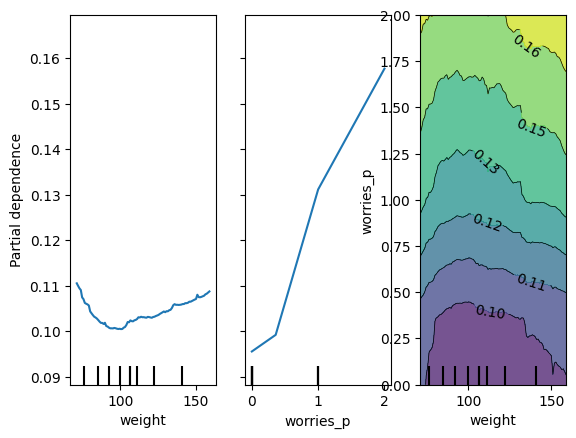

In [63]:
PartialDependenceDisplay.from_estimator(clf, X_train, features, feature_names=list(X_train.columns), n_jobs=4, target="falling")

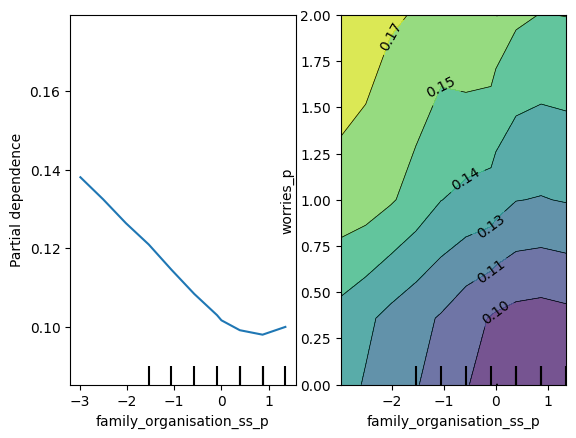

In [65]:
PartialDependenceDisplay.from_estimator(clf, X_train, features_2, feature_names=list(X_train.columns), n_jobs=4, target="falling")

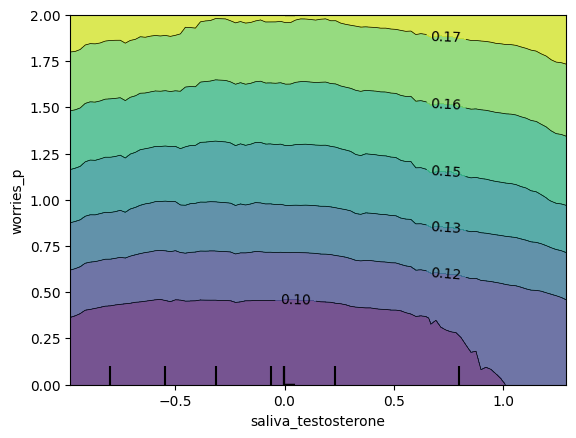

In [56]:
PartialDependenceDisplay.from_estimator(clf, X_test, [("saliva_testosterone", "worries_p")], n_jobs=4, feature_names=list(X_test.columns), target="rising")

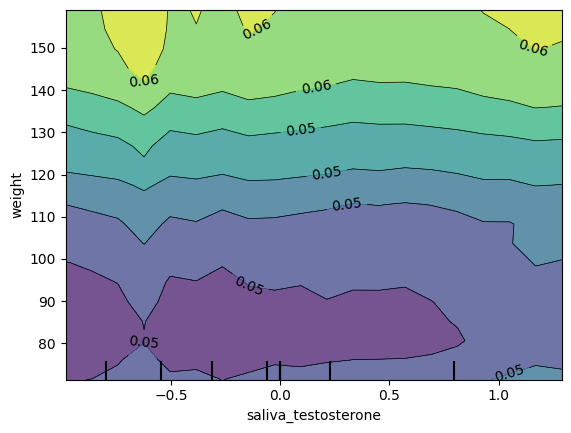

In [68]:
PartialDependenceDisplay.from_estimator(clf, X_test, [("saliva_testosterone", "weight")], grid_resolution=20, n_jobs=4, feature_names=list(X_test.columns), target="high")

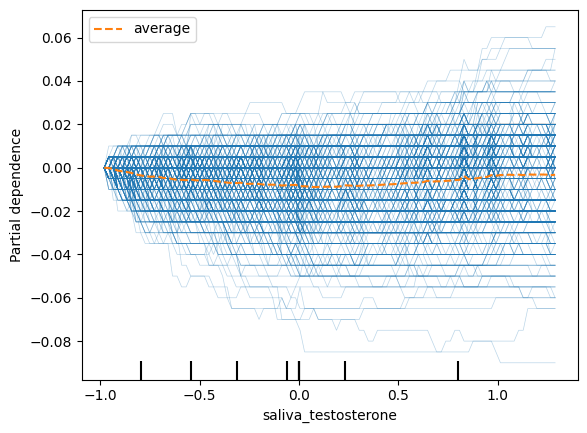

In [81]:
PartialDependenceDisplay.from_estimator(clf, X_test, ['saliva_testosterone'], n_jobs=4, feature_names=list(X_test.columns), target="falling", kind="both", centered=True)

# Within Categories

In [ ]:
# run on within categories next...
# and then run on the low ale kids

tp = 2

all_vars = vars.across_categories + ["latent_class_depression"]
all_data = sample.query(f"time == {tp}")[all_vars]
all_data = all_data[(all_data["latent_class_depression"] != "")]

t_available = all_data.dropna(axis=1, how='all')  # Keep columns with at least some non-NaN values

raw_X = t_available.drop('latent_class_depression', axis=1)
raw_y = t_available['latent_class_depression']

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
raw_X = pd.DataFrame(imputer.fit_transform(raw_X), columns=raw_X.columns)

# Standardize the data
scaler = StandardScaler()
imputed_scaled = pd.DataFrame(scaler.fit_transform(raw_X), columns=raw_X.columns)

X_train, X_test, y_train, y_test = train_test_split(raw_X, raw_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True)
clf.fit(X_train, y_train)

print(f"oob accuracy estimate: {clf.oob_score_}")
print(f"test dataset accuracy: {clf.score(X_test, y_test)}")

coefs = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
vars.save_plot_2(coefs, "random forest", "test accuracy", clf.score(X_test, y_test), tp)